# Star Wars Survey

In this project, we'll analysing the responses of Star Wars fans to a survey conducted by [FiveThirtyEight](http://fivethirtyeight.com/). They received 835 total responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

An example of the kinds of questions they were interested in answering is: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

In [34]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [35]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [36]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## Cleaning the data

We'll start by converting the values in the following two columns to boolean values:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

In [37]:
# Creating a dictionary wiht the boolean values we want
yes_no = {
    "Yes": True,
    "No": False
}

columns = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']

for c in columns:
    star_wars[c] = star_wars[c].map(yes_no)
    print(star_wars[c].value_counts(dropna=False))
    

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply. We'll convert each of these columns to a Boolean, then rename the column something more intuitive.

In [38]:
cols = star_wars.columns[3:9]
new_values = {
    np.nan: False,
    "Star Wars: Episode I  The Phantom Menace": True, 
    "Star Wars: Episode II  Attack of the Clones": True, 
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True, 
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

new_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 
    "Unnamed: 4": "seen_2", 
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4", 
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"}

for c in cols:
    star_wars[c] = star_wars[c].map(new_values)

star_wars = star_wars.rename(columns=new_names)



,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,True,True,True,True,True,True,True,True,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


he next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN. We'll onvert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [43]:
# Converting the column values to floats and renaming them
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

new_names_2 = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1", 
    "Unnamed: 10": "ranking_2", 
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4", 
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"}

star_wars = star_wars.rename(columns=new_names_2)

star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


## Finding the highest-ranked movie

In [62]:
# Getting the average ranking for each film
average_rankings = pd.DataFrame(star_wars[star_wars.columns[9:15]].mean())
average_rankings.reset_index(inplace=True)
average_rankings = average_rankings.rename(columns={'index': 'movies', 0:'average rankings'})


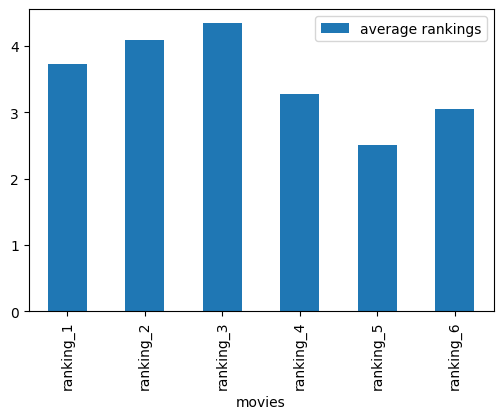

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
average_rankings.plot.bar(x='movies', y='average rankings')
plt.show()

After averaging the scores for each movie and plotting them in a bar chart, we can see that respondents regard Star Wars: Episode V The Empire Strikes Back as the best movie (a lower ranking is better). Generally, the 'original' movies are rated much more highly, which is what we would have expected.

## Finding out which films have been seen by the most respondents

In [66]:
# Getting the average ranking for each film
total_views = pd.DataFrame(star_wars[star_wars.columns[3:9]].sum())
total_views.reset_index(inplace=True)
total_views = total_views.rename(columns={'index': 'films', 0:'views'})                                 
total_views


,films,views
0,seen_1,673
1,seen_2,571
2,seen_3,550
3,seen_4,607
4,seen_5,758
5,seen_6,738


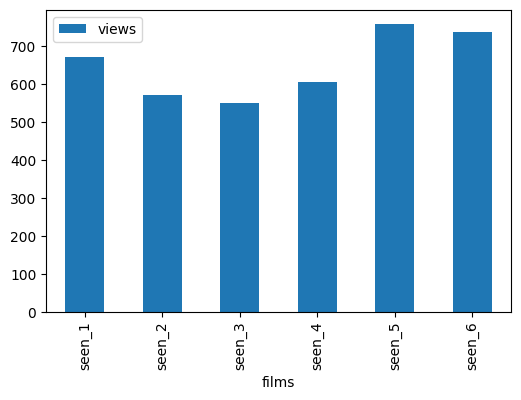

In [70]:
total_views.plot.bar(x='films', y='views')
plt.show()

The original movies were seen by more respondents than the newer movies, with the exception of Star Wars: Episode I  The Phantom Menace. This supports what we saw in the rankings, where the earlier movies seem to be more popular.

## Do preferences differ if the respondent is a Star Wars fan?

Let's examine how certain segments of the survey population responded, specifically those who responded differently to the question "Do you consider yourself to be a fan of the Star Wars film franchise?". It would be interesting to see if fans have different opinions from those who do not identify as fans.

In [81]:
binary_col = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
sw_fan = star_wars[star_wars[binary_col] == True]
sw_neutral = star_wars[star_wars[binary_col] == False]


### Finding the highest ranked movie among this group

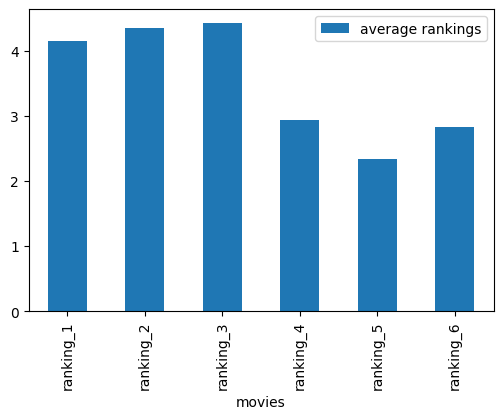

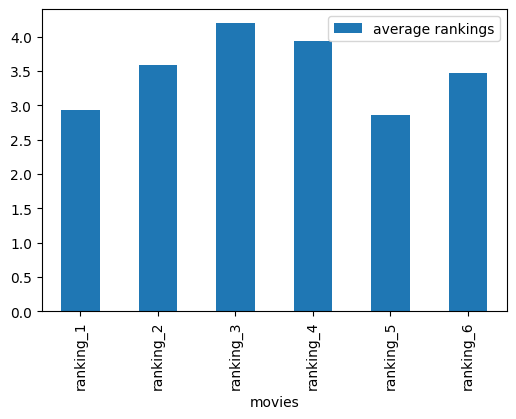

In [82]:
star_wars = [sw_fan, sw_neutral]

# Getting the average ranking for each film
for cat in star_wars:
    average_rankings = pd.DataFrame(cat[cat.columns[9:15]].mean())
    average_rankings.reset_index(inplace=True)
    average_rankings = average_rankings.rename(columns={'index': 'movies', 0:'average rankings'})
    
    average_rankings.plot.bar(x='movies', y='average rankings')
    plt.show()

Both fans and non-fans of the Star Wars franchise tend to consider Episode 5 the best. However, fans have a much stronger preference for the 'original films', while on average non-fans rank the 'original' and 'new films' equally. This could be because fans are those who developed a liking for the the series based on the 'original' films.

## Finding the most-watched film among this group

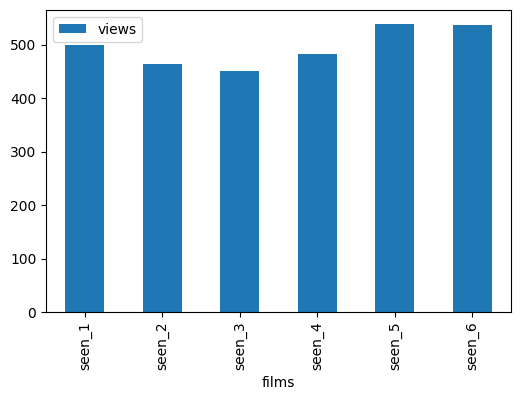

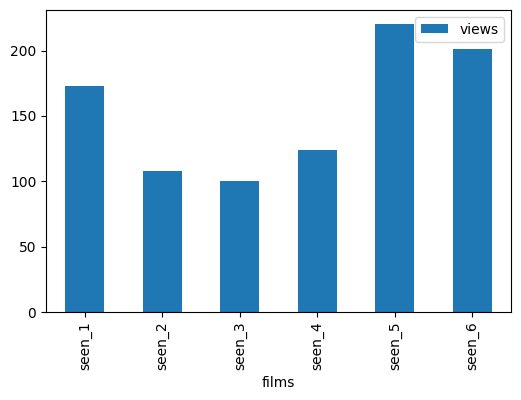

In [83]:
# Getting the average ranking for each film
for cat in star_wars:
    total_views = pd.DataFrame(cat[cat.columns[3:9]].sum())
    total_views.reset_index(inplace=True)
    total_views = total_views.rename(columns={'index': 'films', 0:'views'})                                 
    
    total_views.plot.bar(x='films', y='views')
    plt.show()

As expected, more of the fans have seen all of the films (nearly double compared to non-fans). Significantly fewer fans also watched Episodes 2-3, which could be a reflection of the "hype" or of recommendations for these films.

Possible next steps:
- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are there any interesting patterns?
- Clean columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?